# Aviation Risk Analysis

## Introduction

The csv file that I have analyzed was gathered from the National Transportation Safety Board. It contains aviation accident data from 1962 to 2023 regarding civil aviation accidents and selected incidents occurring in the United States and international waters.

## Steps followed in this notebook
- Understanding the Project Objective

- Data Inspection

- Data Cleaning

- Exploratory Data Analysis (EDA)

- Identify Patterns & Insights


### 1.) Objective
The company is entering the aviation industry without prior expertise in assessing aircraft safety and operational risks. This creates uncertainty in selecting aircraft for purchase and operation. Misjudging the risk profile of aircraft could lead to significant financial loss, operational disruptions, or reputational damage.

The primary goal is to gain actionable insights into aviation safety and identify patterns that can guide business decisions.


### 2.) Data Inspection
This involves:
   - Importing Libraries and Loading the Data
   - Intial exploration of the Data

In [1]:
# Import all necessary data anlysis libraries needed 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load and read the Data into a dataframe.
df= pd.read_csv('Aviation_Data.csv')
df.head()

C:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
df.shape

(90348, 31)

In [4]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### 3.) Data Cleaning
This involved:
- Checking for duplicated rows and removing them
- Dropping columns not needed in this analysis
- Handling missing values
- Fixing Erroneous Data...
    - Typos, Data Entry errors,Incorrect Formatting

In [6]:
#Checking number of duplicated rows
duplicates = df[df.duplicated()] # Will create a dataframe of the duplicates
print(len(duplicates))
duplicates.head()

1390


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
64050,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64052,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64388,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64541,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64552,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Drop the duplicates 
df = df.drop_duplicates()

df.duplicated().value_counts()

False    88958
dtype: int64

In [8]:
#Drop all the columns not needed in this analysis.
columns_to_drop = [
    'Event.Id',              # Just an identifier
    'Accident.Number',       # Identifier, no analytical value
    'Airport.Code',          # Too granular
    'Airport.Name',          # Too granular
    'Registration.Number',   # Tail number, irrelevant for business
    'Report.Status',         # Internal reporting, not risk-related
    'Publication.Date',      # Report filing, not useful for risk analysis
]
df = df.drop(columns=columns_to_drop)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88958 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Country                 88663 non-null  object 
 4   Latitude                34382 non-null  object 
 5   Longitude               34373 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Aircraft.Category       32287 non-null  object 
 9   Make                    88826 non-null  object 
 10  Model                   88797 non-null  object 
 11  Amateur.Built           88787 non-null  object 
 12  Number.of.Engines       82805 non-null  float64
 13  Engine.Type             81812 non-null  object 
 14  FAR.Description         32023 non-null

In [10]:
#From the dataframe info we can clearly see there is alot of missing values.
#easier way to see it is checking the sum of the misssing values
df.isna().sum()

Investigation.Type            0
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
dtype: int64

In [11]:
#Drop columns that have roughly more than 25% of their data missing
cols_to_drop = ['Latitude', 'Longitude', 'Aircraft.Category', 'FAR.Description',
                   'Schedule', 'Air.carrier']

aviation_df= df.drop(columns=cols_to_drop) #aviation_df is the dataframe will be working with

In [12]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88958 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Country                 88663 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Make                    88826 non-null  object 
 7   Model                   88797 non-null  object 
 8   Amateur.Built           88787 non-null  object 
 9   Number.of.Engines       82805 non-null  float64
 10  Engine.Type             81812 non-null  object 
 11  Purpose.of.flight       82697 non-null  object 
 12  Total.Fatal.Injuries    77488 non-null  float64
 13  Total.Serious.Injuries  76379 non-null  float64
 14  Total.Minor.Injuries    76956 non-null

#### 3.1.) Fixing Erroneous & Extaneous Data
This includes-

    -Typos and data entry errors such as difference in capitalization in the 'Make' column as well as values in the injuries columns
    -Formating in the event date column 

In [13]:
#Replace and rename some of the missing values in the columns 
aviation_df['Total.Fatal.Injuries'].fillna(0, inplace = True)
aviation_df['Total.Serious.Injuries'].fillna(0, inplace = True)
aviation_df['Total.Minor.Injuries'].fillna(0, inplace = True)
aviation_df['Total.Uninjured'].fillna(0, inplace = True)
aviation_df['Broad.phase.of.flight'].fillna('Unknown',inplace = True)
aviation_df['Weather.Condition'].fillna('UNKNOWN',inplace = True)
aviation_df['Weather.Condition'].replace({'UNK':'UNKNOWN'},inplace=True)
aviation_df['Aircraft.damage'].fillna('UNKNOWN',inplace=True)
aviation_df['Engine.Type'].fillna('UNKNOWN',inplace=True)
aviation_df['Purpose.of.flight'].fillna('Other Work Use',inplace=True)
aviation_df['Amateur.Built'].fillna('No',inplace=True)

In [14]:
# Merge different capitalizations of Make togheter
aviation_df['Make'] = aviation_df['Make'].str.title()

# Transform Amateur Built to boolean
aviation_df['Amateur.Built'].replace(to_replace = ['Yes', 'Y'], value = True, inplace = True, regex = False)
aviation_df['Amateur.Built'].replace(to_replace = ['No', 'N'], value = False, inplace = True, regex = False)

# Remove amount of injuries as this is aleady in another column
aviation_df['Injury.Severity'] = aviation_df['Injury.Severity'].str.split('(').str[0]

##### Adding new columns to help visualize as well as analyze the data well.

In [15]:
# Convert Date to a datetime, add a Year & Month column
aviation_df['Event.Date'] = pd.to_datetime(aviation_df['Event.Date'])

#Add a day, month & year column
#aviation_df['Year'] = aviation_df['Event.Date'].apply(lambda time : time.year)
#aviation_df['Month']= aviation_df['Event.Date'].apply(lambda time:time.month)
aviation_df['Year'] = aviation_df['Event.Date'].dt.year
aviation_df['Month'] = aviation_df['Event.Date'].dt.month_name().str[:3] #Preffered this over the lmbda one since it gave the month name
aviation_df['Day'] = aviation_df['Event.Date'].dt.day_name().str[:3]


In [16]:
# Split location in city and state
aviation_df['City'] = aviation_df['Location'].str.split(',').str[0]
aviation_df['State'] = aviation_df['Location'].str.split(',').str[1]

In [17]:
aviation_df['Total_Fatal'] = aviation_df['Total.Fatal.Injuries'] + aviation_df['Total.Serious.Injuries']
aviation_df['Total_NonFatal']=aviation_df['Total.Minor.Injuries']+ aviation_df['Total.Uninjured']

In [18]:
aviation_df.head(7)

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,...,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Year,Month,Day,City,State,Total_Fatal,Total_NonFatal
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,Stinson,108-3,False,1.0,...,0.0,UNKNOWN,Cruise,1948.0,Oct,Sun,MOOSE CREEK,ID,2.0,0.0
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,Piper,PA24-180,False,1.0,...,0.0,UNKNOWN,Unknown,1962.0,Jul,Thu,BRIDGEPORT,CA,4.0,0.0
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal,Destroyed,Cessna,172M,False,1.0,...,0.0,IMC,Cruise,1974.0,Aug,Fri,Saltville,VA,3.0,0.0
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,Rockwell,112,False,1.0,...,0.0,IMC,Cruise,1977.0,Jun,Sun,EUREKA,CA,2.0,0.0
4,Accident,1979-08-02,"Canton, OH",United States,Fatal,Destroyed,Cessna,501,False,NaN,...,0.0,VMC,Approach,1979.0,Aug,Thu,Canton,OH,3.0,0.0
5,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Mcdonnell Douglas,DC9,False,2.0,...,44.0,VMC,Climb,1979.0,Sep,Mon,BOSTON,MA,0.0,45.0
6,Accident,1981-08-01,"COTTON, MN",United States,Fatal,Destroyed,Cessna,180,False,1.0,...,0.0,IMC,Unknown,1981.0,Aug,Sat,COTTON,MN,4.0,0.0


### 4.) Exploratory Data Analysis
#### 4.1)Accidents Over The Years
- In the dataset we have the accidents and incidents that happen over the years.
- The accidents are the serious safety events where most if not all are the causes of the fatal injuries and serious damages on the aircraft.
- We also have the incidents which affect or could affect the safety of operations and don’t always involve injuries or substantial aircraft damage

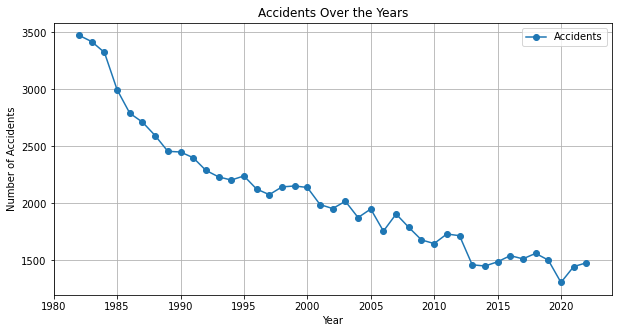

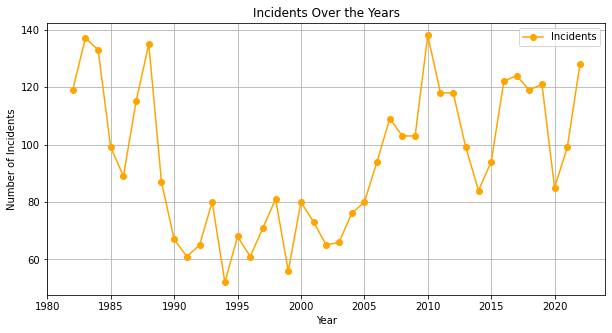

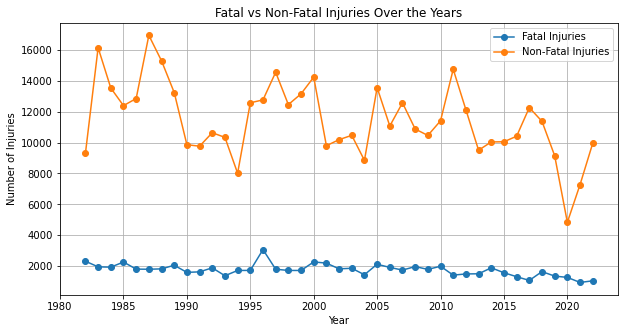

In [19]:
aviation_df= aviation_df[aviation_df['Year'] >= 1982]    #This is because there are no records of the accidents in the years before 1982

# 1. Accidents over the years

accidents_per_year = aviation_df[aviation_df['Investigation.Type'] == 'Accident'].groupby('Year').size()

plt.figure(figsize=(10,5))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', label='Accidents')
plt.title("Accidents Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.legend()
plt.grid(True)
plt.show()

# 2. Incidents over the years

incidents_per_year = aviation_df[aviation_df['Investigation.Type'] == 'Incident'].groupby('Year').size()

plt.figure(figsize=(10,5))
plt.plot(incidents_per_year.index, incidents_per_year.values, marker='o', color='orange', label='Incidents')
plt.title("Incidents Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend()
plt.grid(True)
plt.show()

# 3. Fatal vs Non-Fatal Injuries

injuries_per_year = aviation_df.groupby('Year').agg({
    'Total_Fatal': 'sum',
    'Total_NonFatal': 'sum'
})

plt.figure(figsize=(10,5))
plt.plot(injuries_per_year.index, injuries_per_year['Total_Fatal'], marker='o', label='Fatal Injuries')
plt.plot(injuries_per_year.index, injuries_per_year['Total_NonFatal'], marker='o', label='Non-Fatal Injuries')
plt.title("Fatal vs Non-Fatal Injuries Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Injuries")
plt.legend()
plt.grid(True)
plt.show()

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Number of Accidents'),
 Text(0.5, 1.0, 'Number of aviation accidents per month')]

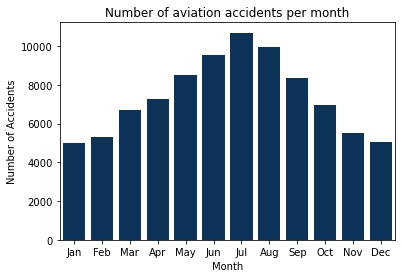

In [20]:
# Months with the most accidents
plot = sns.countplot(x = 'Month', color = '#003366', data = aviation_df)
plot.set(xlabel = 'Month', ylabel = 'Number of Accidents', title = 'Number of aviation accidents per month')

#### 4.2) Flight Phases Analysis
Knowing which phase is riskiest will help with risk planning.

In [21]:
by_phase = aviation_df.groupby('Broad.phase.of.flight').sum().reset_index()
by_phase

,Broad.phase.of.flight,Amateur.Built,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Total_Fatal,Total_NonFatal
0,Approach,694,7637.0,3841.0,1918.0,2526.0,21538.0,13043144.0,5759.0,24064.0
1,Climb,203,2591.0,1762.0,606.0,961.0,19464.0,4051808.0,2368.0,20425.0
2,Cruise,891,11742.0,6166.0,2183.0,4531.0,45757.0,20456274.0,8349.0,50288.0
3,Descent,123,2266.0,913.0,473.0,998.0,18958.0,3760876.0,1386.0,19956.0
4,Go-around,80,1540.0,587.0,388.0,622.0,2045.0,2696621.0,975.0,2667.0
5,Landing,921,17040.0,518.0,1234.0,3209.0,48533.0,30752201.0,1752.0,51742.0
6,Maneuvering,994,8405.0,5323.0,1912.0,1980.0,5447.0,16229915.0,7235.0,7427.0
7,Other,17,130.0,85.0,13.0,21.0,549.0,236979.0,98.0,570.0
8,Standing,22,1304.0,161.0,241.0,397.0,18612.0,1883953.0,402.0,19009.0
9,Takeoff,1455,14006.0,4304.0,3138.0,4955.0,45083.0,24894897.0,7442.0,50038.0


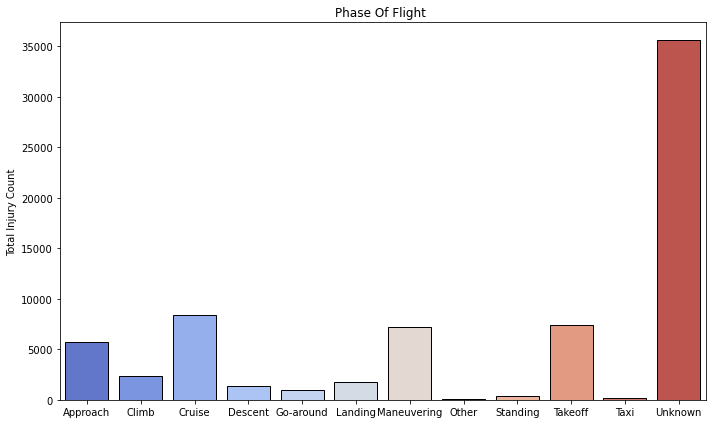

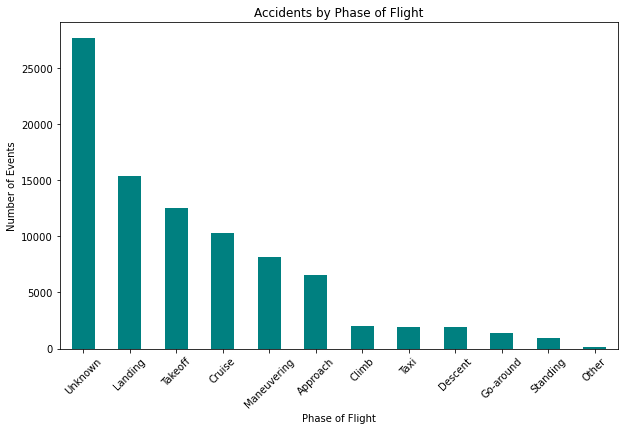

In [22]:
# Fatalities by phase of flight
plt.figure(figsize = (10,6))
sns.barplot(x = 'Broad.phase.of.flight',y='Total_Fatal' , data = by_phase , palette = 'coolwarm', ec = 'black')
plt.title('Phase Of Flight ')
plt.xlabel('')
plt.ylabel('Total Injury Count')
plt.tight_layout()

# Accidents by flight phases
phase_counts = aviation_df['Broad.phase.of.flight'].value_counts()

plt.figure(figsize=(10,6))
phase_counts.plot(kind='bar', color='teal')
plt.title("Accidents by Phase of Flight")
plt.xlabel("Phase of Flight")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.show()

#### 4.2) Make & Model Safety of the Aircrafts
Checking to see which aircraft make and models have low and high accident anf fatality rates

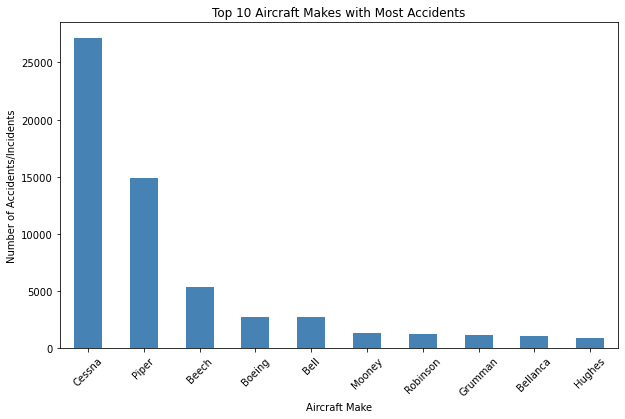

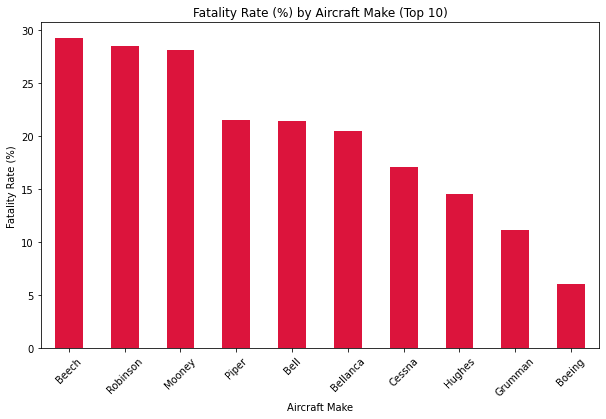

In [23]:
# Top 10 aircraft makes with most accidents
best_make = aviation_df['Make'].value_counts().head(10)

plt.figure(figsize=(10,6))
best_make.plot(kind='bar', color='steelblue')
plt.title("Top 10 Aircraft Makes with Most Accidents")
plt.xlabel("Aircraft Make")
plt.ylabel("Number of Accidents/Incidents")
plt.xticks(rotation=45)
plt.show()

# Fatality rate by aircraft make
fatal_by_make = aviation_df[aviation_df['Injury.Severity'] == 'Fatal']['Make'].value_counts().head(10)
fatality_rate = (fatal_by_make / best_make) * 100

plt.figure(figsize=(10,6))
fatality_rate.sort_values(ascending=False).plot(kind='bar', color='crimson')
plt.title("Fatality Rate (%) by Aircraft Make (Top 10)")
plt.xlabel("Aircraft Make")
plt.ylabel("Fatality Rate (%)")
plt.xticks(rotation=45)
plt.show()

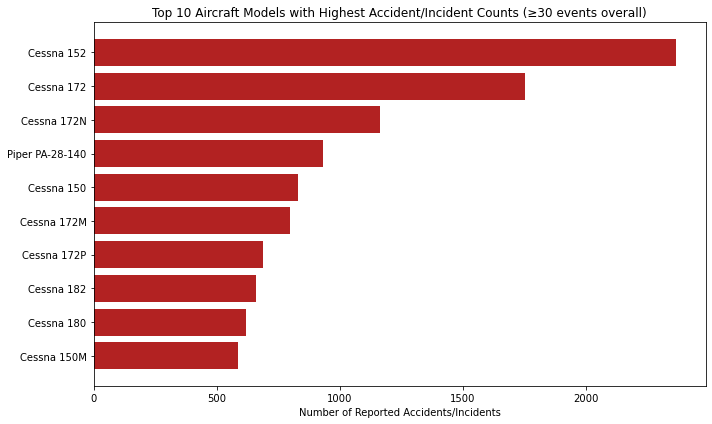

In [24]:
# Combine Make + Model into a single field
aviation_df['make_model'] = aviation_df['Make'].astype(str).str.strip() + " " + aviation_df['Model'].astype(str).str.strip()

# Count number of events per model
model_counts = aviation_df['make_model'].value_counts().reset_index()
model_counts.columns = ['make_model', 'events']

# Filter to only models with at least 30 events (to avoid very rare models skewing results)
model_counts_filtered = model_counts[model_counts['events'] >= 30]

# Sort by highest events and take top 10
riskiest_models = model_counts_filtered.sort_values(by='events', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh(riskiest_models['make_model'], riskiest_models['events'], color='firebrick')
plt.xlabel("Number of Reported Accidents/Incidents")
plt.title("Top 10 Aircraft Models with Highest Accident/Incident Counts (≥30 events overall)")
plt.gca().invert_yaxis()  # largest at top
plt.tight_layout()
plt.show()

#### 4.4) Purpose of Flight


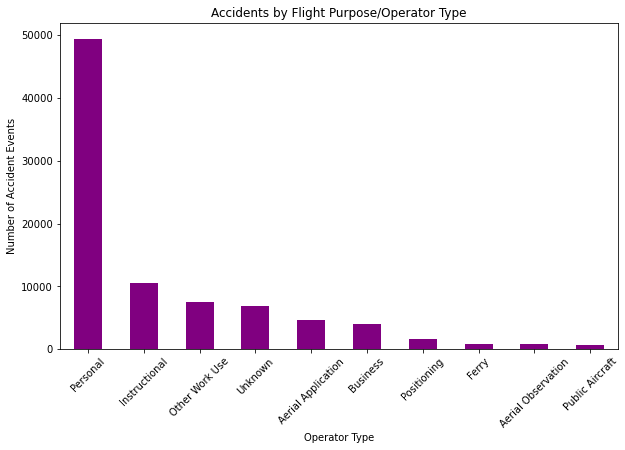

In [25]:
# Accidents by operator category
operator_counts = aviation_df['Purpose.of.flight'].value_counts().head(10)

plt.figure(figsize=(10,6))
operator_counts.plot(kind='bar', color='purple')
plt.title("Accidents by Flight Purpose/Operator Type")
plt.xlabel("Operator Type")
plt.ylabel("Number of Accident Events")
plt.xticks(rotation=45)
plt.show()

#### 4.5) Weather Conditions

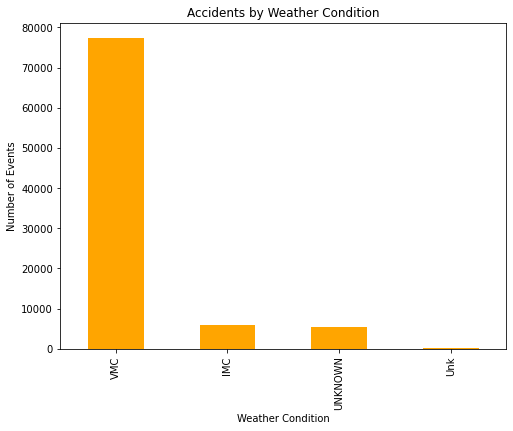

In [26]:
# Accidents by weather condition
weather_counts =aviation_df['Weather.Condition'].value_counts()

plt.figure(figsize=(8,6))
weather_counts.plot(kind='bar', color='orange')
plt.title("Accidents by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Events")
plt.show()

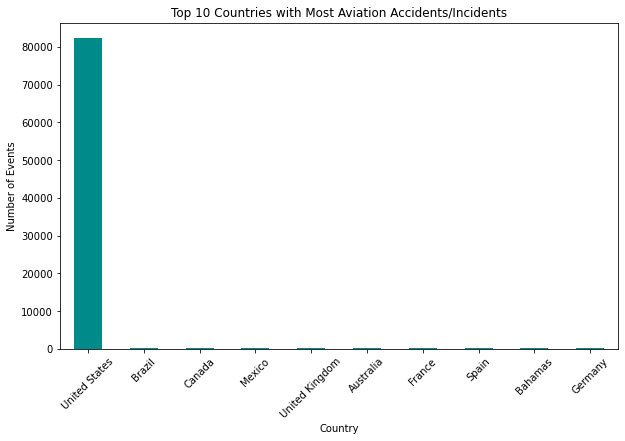

In [27]:
# Accidents by country (top 10)
country_counts = aviation_df['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
country_counts.plot(kind='bar', color='darkcyan')
plt.title("Top 10 Countries with Most Aviation Accidents/Incidents")
plt.xlabel("Country")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.show()

In [28]:
severity_counts = aviation_df['Injury.Severity'].value_counts()
severity_counts

Non-Fatal      67356
Fatal          17820
Incident        2219
Minor            218
Serious          173
Unavailable       96
Name: Injury.Severity, dtype: int64

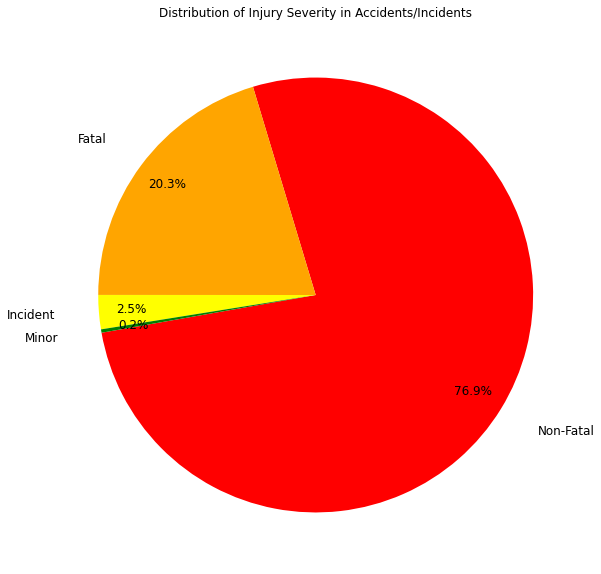

In [29]:
# Distribution of injury severity
severity_counts = aviation_df['Injury.Severity'].value_counts().head(4)

plt.figure(figsize=(15,10))
severity_counts.plot(kind='pie', 
                     autopct='%1.1f%%',    # show percentages with 1 decimal place
                     startangle=190,       # rotate start for better spacing
                     pctdistance=0.85,     # move % labels outward
                     labeldistance=1.2,    # move text labels outward
                     textprops={'fontsize': 12, 'color': 'black'},  # bigger, clearer font
                     colors=['red','orange','yellow','green','blue','purple'] )
plt.title("Distribution of Injury Severity in Accidents/Incidents")
plt.ylabel("")
plt.show()

### Recommendations
1. Accidents over the years
    - Total aviation accidents/incidents peaked in earlier decades and have declined significantly since the 1980s.
    - Fatal events follow the same downward trend, showing safety improvements over time.

2. Aircraft Make & Model Safety
    - Some makes appear frequently in accidents, while others are rarely involved.
    - Among the top makes, certain aircraft have much lower fatality rates compared to peers.
3. Phase of Flight Risk
    - Most accidents occur during takeoff and landing phases, while cruise has far fewer incidents.Landing often has a higher share of fatal outcomes.
4. Weather Conditions
    - The majority of accidents occur in visual meteorological conditions (clear weather) simply because most flights occur in good weather.
    - However, the fatality rate is higher in poor/Instrument Meteorological Conditions (IMC).
5. Injury Severity
    - Many aviation accidents result in no injuries or minor injuries, but a notable share still leads to fatalities.
    - Fatal accidents, while less frequent, are highly impactful.
6. Operator Type
    - Private and general aviation operators account for a disproportionately higher number of accidents compared to commercial airlines.
    - Commercial operators show lower accident and fatality rates due to stricter regulations and safety checks. 

### Conclusion:
1. Modern aircraft (post-1990) are generally safer.The company should prioritize newer aircraft models instead of older ones with higher historical risks.
2. The company should invest in aircraft models with consistently low accident frequency and fatality rates.Avoid makes with disproportionately high fatal accidents.
3. Aircraft with advanced autopilot, landing assist, and navigation technologies should be prioritized.Training programs for pilots should emphasize takeoff and landing safety.
4. The company should purchase aircraft with enhanced weather resilience (radar, de-icing, navigation systems).Develop policies to limit risky flights in poor weather.
5. The company should invest in aircraft with strong safety records and crashworthiness.Proactive risk management strategies (maintenance, inspections) can keep fatality rates low.
6. The company should adopt a commercial-grade operational model, even if entering private charter markets.Safety culture and compliance with airline-level standards will minimize risk.

In [30]:
#I saved my cleaned dataframe called aviation_df to CSV to use it to create my dashboard.
# aviation_df.to_csv("Cleaned_Aviation_Data.csv", index=False)